**Libraries** **Importation**

In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from copy import deepcopy
import time
import matplotlib
import matplotlib.colors as colors

**Grid Color View**

In [2]:
mapColor= ['black', 'green', 'red']

**Given parameters**

In [3]:
treeNotOnFire = 1
treeOnFire = 2
empty = 0

**Forest Cell Grid initialization**

In [4]:
def initForestGrid(n, probTree, probBurning):
    startTime = time.time();
    gridCell = np.zeros((n, n))
    for row in range(n):
        for column in range(n):
            if np.random.random() < probTree:
                if np.random.random() > probBurning:
                    gridCell[row][column] = treeNotOnFire
                else:
                    gridCell[row][column] = treeOnFire
    return gridCell,startTime

**Algorithm explanation**

1. Creation of a method that accepts three parameters.The number of grid cells, the probability of Tree availability and lastly the probability of the tree burning.

2. use of numpy to generate zeros to initiate an empty space of size n rows and n column.

3. Iterating through the empty generated rows and colums.

4. Assiging possible values of having tree and further checking to asign the value to be either buring or not.

**Initialization of spread function**

In [5]:

#@jit(nopython=True, parallel=True)
def applySpread(grid, probImmune, probLightning):
    n = grid.shape[0]
    newGrid = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if grid[i][j] == 0:
                continue
            if grid[i][j] == 2:
                newGrid[i][j] = 0
            elif grid[i][j] == 1:
                newGrid[i][j] = 1
                neighbors = []

                #Moore Neighborhood implementation
                if i > 0:
                    neighbors.append(grid[i-1][j])
                    if j > 0:
                        neighbors.append(grid[i-1][j-1])
                    if j < n-1:
                        neighbors.append(grid[i-1][j+1])
                if i < n-1:
                    neighbors.append(grid[i+1][j])
                    if j > 0:
                        neighbors.append(grid[i+1][j-1])
                    if j < n-1:
                        neighbors.append(grid[i+1][j+1])
                if j > 0:
                    neighbors.append(grid[i][j-1])
                if j < n-1:
                    neighbors.append(grid[i][j+1])
                if 2 in neighbors or (1 in neighbors and np.random.random() < probLightning):
                    newGrid[i][j] = 2
                    if np.random.random() < probImmune:
                        newGrid[i][j] = 1
    return newGrid

**Algorithm Explanation** 

1. creation of fire spread value 

2. Asigning value 0 to burnt area and still maintaining the value of untouched tree to be 1.

3. Looping through row and column to implement moore eight direction movement.

4. Checking the whether lightning would cause a tree to to burn or not.

5. Lastly, assigning the value to be 1 when ligthning has no effect on it.

6. Using the nomba annotation to normalise the sequential approach.

**Simulation Creation**

In [6]:
def simulateForestFire(n, probTree, probBurning, probImmune, probLightning, timeStep):
    createdGrid = initForestGrid(n, probTree, probBurning)[0]
    startTime = initForestGrid(n, probTree, probBurning)[1]
    grids = [createdGrid]

    for i in range(timeStep):
        createdGrid = applySpread(createdGrid, probImmune, probLightning)
        grids.append(deepcopy(createdGrid))        
    endTime = time.time()
    computationTime = endTime - startTime
    print(f'Computation time obtained for grid {n} is  {computationTime}')
    return grids

**Algorithm Explanation**

1. using the initForesGrid method to create grids

2. Assigning the createdGrid into an array of Grid for each time step

3. Appply the spread method at each step time

4. outputing the grids created

**Looping through various value of n**

In [7]:
probabilityofTree = 0.8
probabilityOfBurning = 0.01
probabilityOfImmune = 0.3
probabilityofLigthening = 0.001
timeStep = 30

#simulateForestFire(100, probabilityofTree,probabilityOfBurning,probabilityOfImmune,probabilityofLigthening,timeStep)
nValues = [100,400,800,1000]

for n in nValues:
 simulateForestFire(n, probabilityofTree,probabilityOfBurning,probabilityOfImmune,probabilityofLigthening,timeStep)



Computation time obtained for grid 100 is  0.7205801010131836
Computation time obtained for grid 400 is  17.11632752418518
Computation time obtained for grid 800 is  37.246652126312256
Computation time obtained for grid 1000 is  60.81141376495361


In [8]:
def visualize_forest_fire(grids):
    fig, ax = plt.subplots()
    colorMap = colors.ListedColormap(mapColor)
    bounds = [0, 1, 2, 3]
    norm = matplotlib.colors.BoundaryNorm(bounds, colorMap.N)
    mat = ax.matshow(grids[0], cmap=colorMap, norm=norm, aspect='auto')

    def update(i):
        mat.set_data(grids[i])
        return [mat]

    ani = animation.FuncAnimation(fig, update, frames=len(grids), interval=1000, blit=True)
    ani.save('moore_fire_simulation_view.gif', writer='imagemagick')
    plt.show()

Visualise a specific grid size

Computation time obtained for grid 100 is  0.5313816070556641


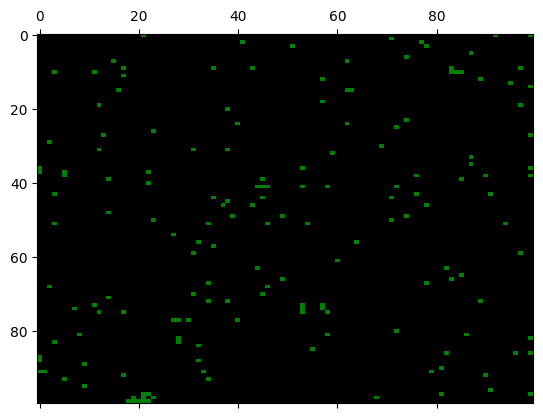

In [9]:
n = 100
grids = simulateForestFire(n, probabilityofTree,probabilityOfBurning,probabilityOfImmune,probabilityofLigthening,timeStep)

visualize_forest_fire(grids)

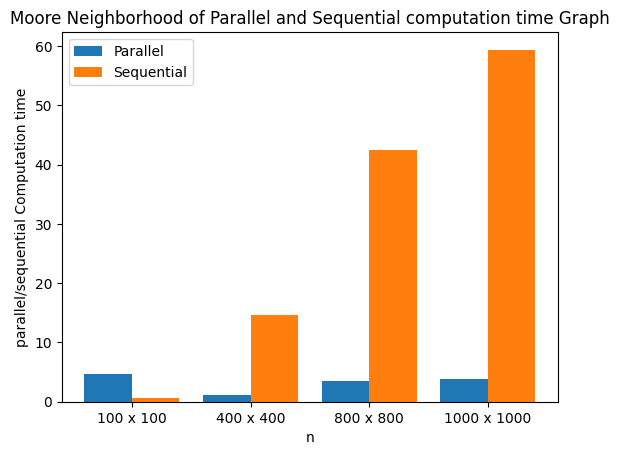

In [10]:


import numpy as np  
import matplotlib.pyplot as plt  

  

X = ['100 x 100','400 x 400','800 x 800','1000 x 1000'] 

parallel = [4.60,1.06,3.44,3.75] 

sequential  = [0.68,14.69,42.38,59.36] 

  

X_axis = np.arange(len(X)) 

  

plt.bar(X_axis - 0.2, parallel, 0.4, label = 'Parallel') 

plt.bar(X_axis + 0.2, sequential, 0.4, label = 'Sequential') 

  
plt.xticks(X_axis, X) 

plt.xlabel("n") 

plt.ylabel("parallel/sequential Computation time") 

plt.title("Moore Neighborhood of Parallel and Sequential computation time Graph") 
plt.legend() 
plt.show() 